In [2]:
from data.loader import load_segmentation_dataset, load_train_dataset
from models.u2net import U2NET
from utils.display import display, DisplayCallback
from utils.metrics import RoundedAccuracy, RoundedMeanIoU, FBetaScore

import matplotlib.pyplot as plt

import numpy as np
import tensorflow as tf
import keras

from keras.metrics import MeanSquaredError, Precision, Recall

tf.debugging.disable_traceback_filtering()

In [3]:
TRAIN_DATASETS = ["DUTS-TR"]
TEST_PATH = "./datasets/DUTS-TE/"

IMAGE_SHAPE = (320, 320, 3)
MASK_SHAPE = (320, 320, 1)

# Training
BATCH_SIZE = 8
EPOCHS = 100
LEARNING_RATE = 0.001

In [4]:
train_dataset = load_train_dataset(
    dir_path = ["./datasets/{}/".format(i) for i in TRAIN_DATASETS],
    image_shape = IMAGE_SHAPE,
    mask_shape = MASK_SHAPE,
    batch=BATCH_SIZE,
)

test_dataset = load_segmentation_dataset(
    dir_path = TEST_PATH,
    image_shape = IMAGE_SHAPE,
    mask_shape = MASK_SHAPE
).batch(BATCH_SIZE)

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2023-03-18 15:03:39.020220: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-18 15:03:39.020380: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


2023-03-18 15:03:42.286465: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


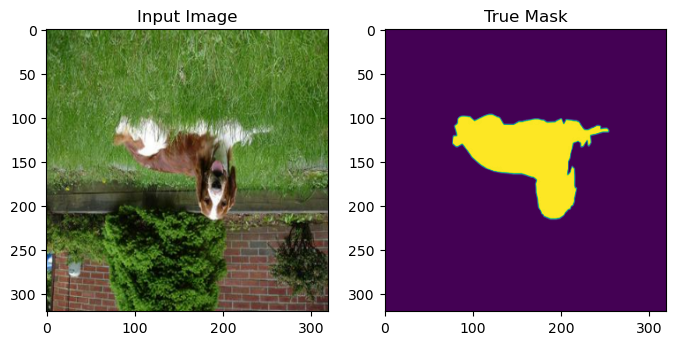

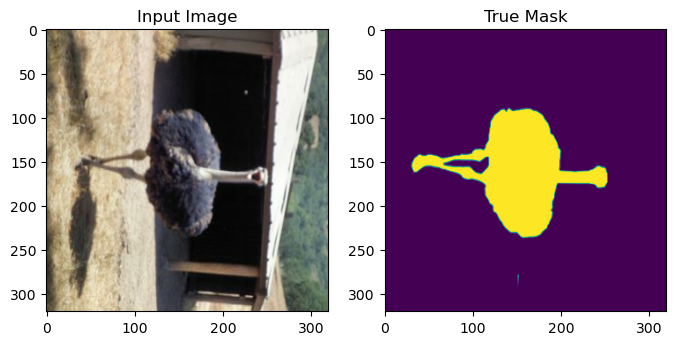

In [5]:
for images, masks in train_dataset.take(2):
  sample_image, sample_mask = images[0], masks[0]
  display([sample_image, sample_mask], ['Input Image', 'True Mask'], figsize=(8, 4))

In [6]:
# Изображение для отладки обучения
for images, masks in test_dataset.take(1):
    test_image_for_display = images[6]
    test_mask_for_display = masks[6]

In [8]:
adam = keras.optimizers.Adam(learning_rate=LEARNING_RATE, beta_1=.9, beta_2=.999, epsilon=1e-08)
bce = keras.losses.BinaryCrossentropy()

model = U2NET(shape_image=IMAGE_SHAPE)
model.compile(optimizer=adam, loss=bce, metrics=[
    [RoundedAccuracy(), MeanSquaredError(), RoundedMeanIoU(num_classes=2), Precision(0.5), Recall(0.5)]] + [None] * 6)

INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets



Sample Prediction after epoch 1



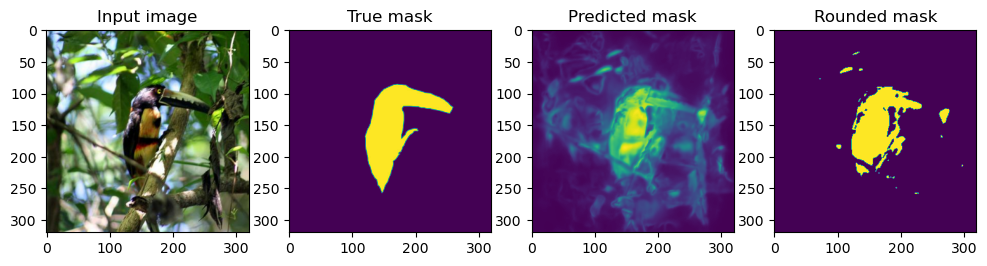

INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets



Sample Prediction after epoch 11



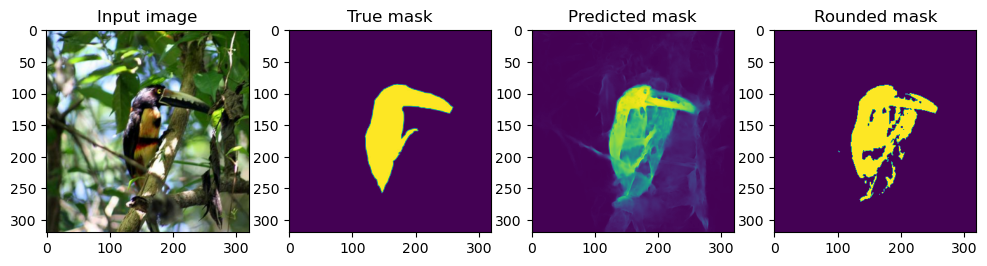

INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets



Sample Prediction after epoch 21



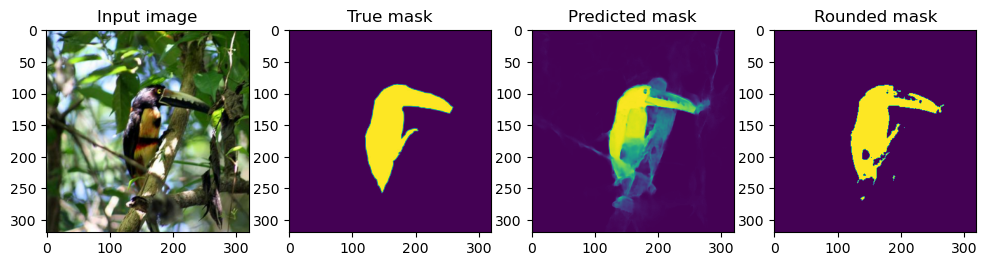

INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets



Sample Prediction after epoch 31



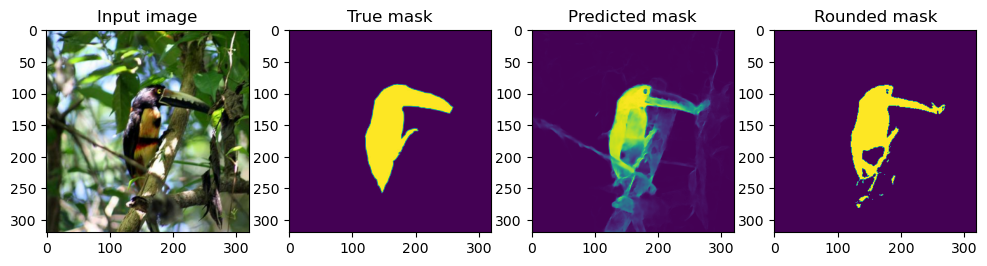

INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets



Sample Prediction after epoch 41



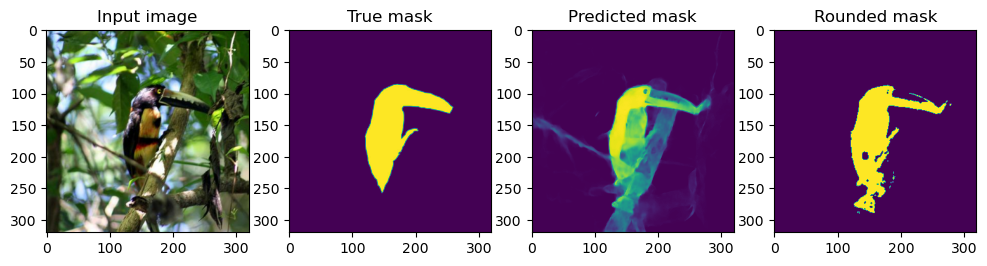


Sample Prediction after epoch 51



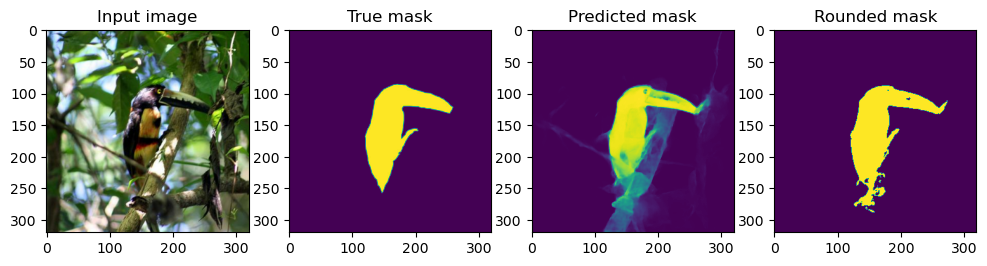


Sample Prediction after epoch 61



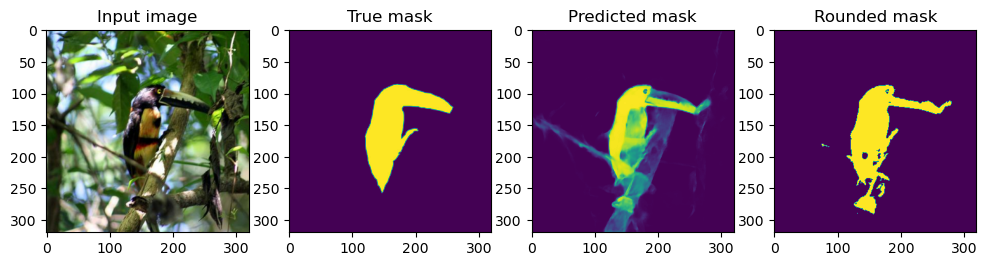

INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets



Sample Prediction after epoch 71



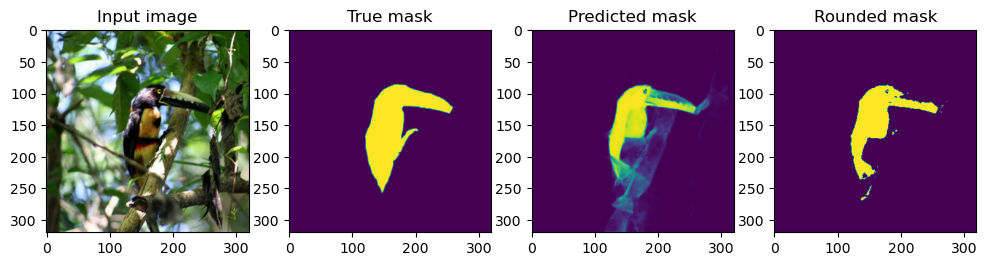

INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets



Sample Prediction after epoch 81



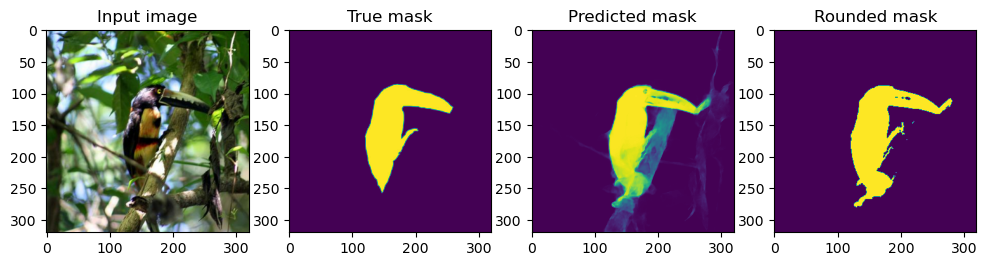


Sample Prediction after epoch 91



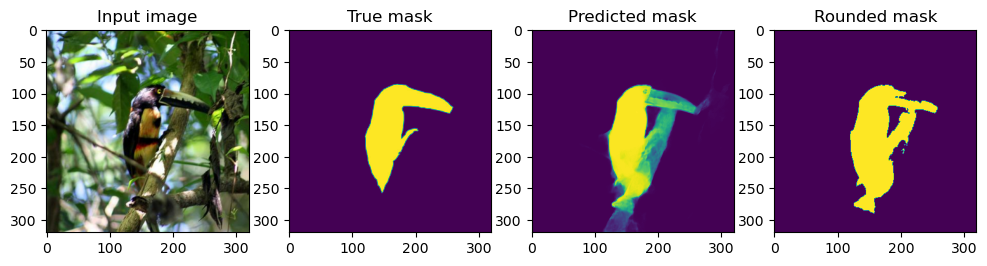

INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets



Sample Prediction after epoch 100



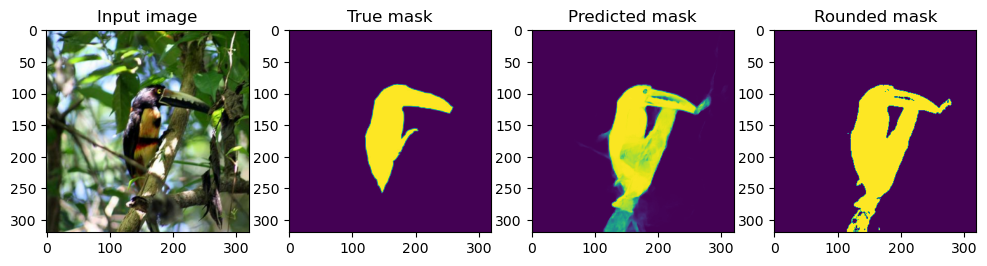

INFO:tensorflow:Assets written to: ./saved_models/u2net/latest\assets


INFO:tensorflow:Assets written to: ./saved_models/u2net/latest\assets


In [10]:
callbacks = [
    keras.callbacks.TensorBoard(log_dir="./logs"),
    keras.callbacks.BackupAndRestore("./bkp"),
    keras.callbacks.ModelCheckpoint("./saved_models/u2net/best", monitor="val_activation_mean_squared_error", save_best_only=True),
    DisplayCallback(test_image_for_display, test_mask_for_display, 10, total_epochs=EPOCHS),
]

history = model.fit(train_dataset, validation_data=test_dataset, callbacks=callbacks, epochs=EPOCHS, verbose=0)
model.save('./saved_models/u2net/latest', include_optimizer=False)

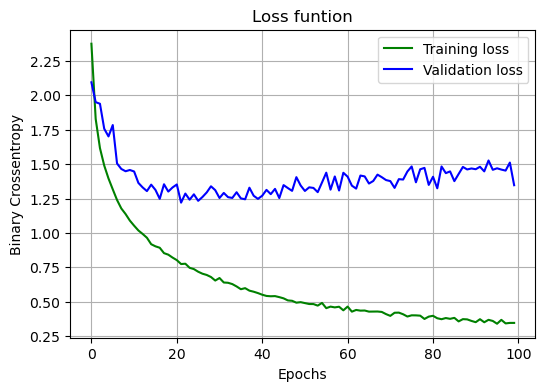

In [11]:
# loss outputs
plt.figure(figsize=(6, 4))
loss = history.history["loss"]
val_loss = history.history['val_loss']
    
plt.plot(history.epoch, loss, 'g', label='Training loss')
plt.plot(history.epoch, val_loss, 'b', label='Validation loss')
plt.title('Loss funtion')
plt.ylabel('Binary Crossentropy')
plt.xlabel('Epochs')
plt.legend()
plt.grid()

plt.show()

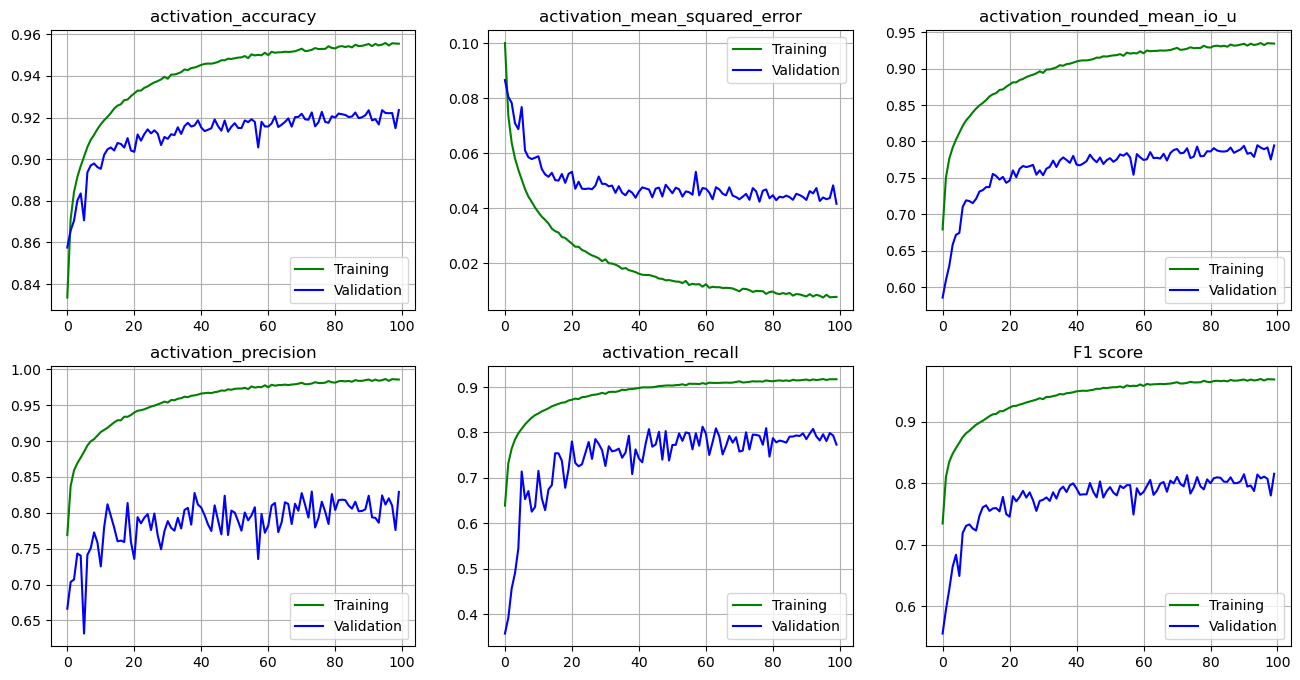

In [38]:
# metrics
metrics_titles_list = [
    "activation_accuracy", 
    "activation_mean_squared_error", 
    "activation_rounded_mean_io_u", 
    "activation_precision", 
    "activation_recall"
]

fig, axs = plt.subplots(2, 3, figsize=(16, 8))
axs = axs.ravel()

for i, metrics_name in enumerate(metrics_titles_list):
    metrics = history.history[metrics_name]
    val_metrics = history.history['val_' + metrics_name]
    
    axs[i].plot(history.epoch, metrics, 'g', label='Training')
    axs[i].plot(history.epoch, val_metrics, 'b', label='Validation')
    axs[i].set_title(metrics_name)
    axs[i].legend()
    axs[i].grid()
    
f1_scores = list(map(lambda x: FBetaScore(x[0], x[1], 0.3), zip(history.history['activation_precision'], history.history['activation_recall'])))
val_f1_scores = list(map(lambda x: FBetaScore(x[0], x[1], 0.3), zip(history.history['val_activation_precision'], history.history['val_activation_recall'])))
axs[5].plot(history.epoch, f1_scores, 'g', label='Training')
axs[5].plot(history.epoch, val_f1_scores, 'b', label='Validation')
axs[5].set_title('F1 score')
axs[5].legend()
axs[5].grid()

plt.show()

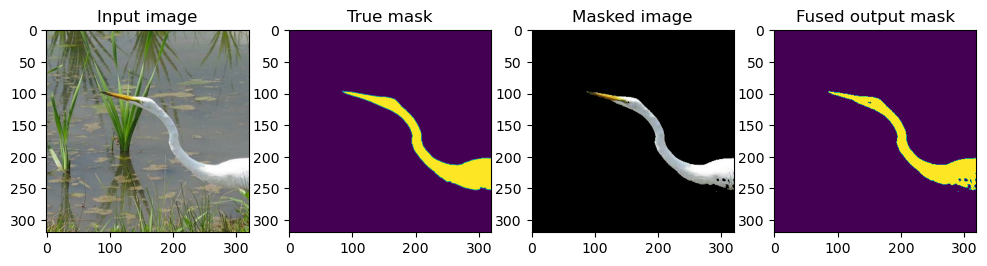

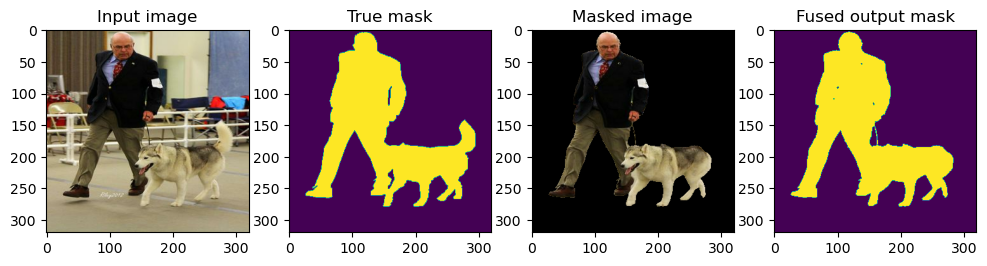

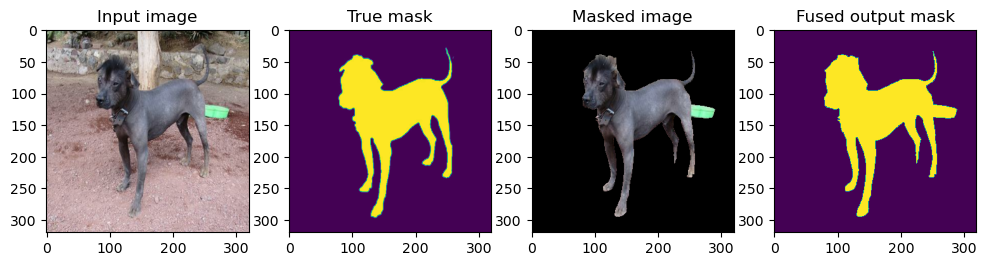

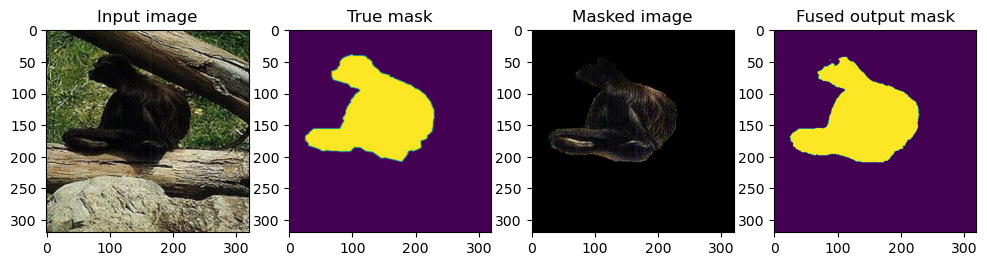

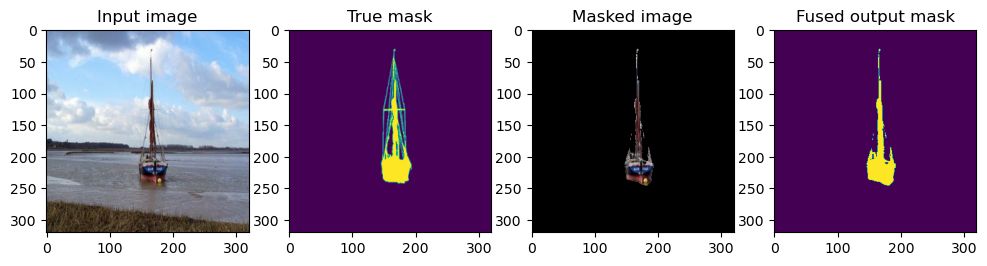

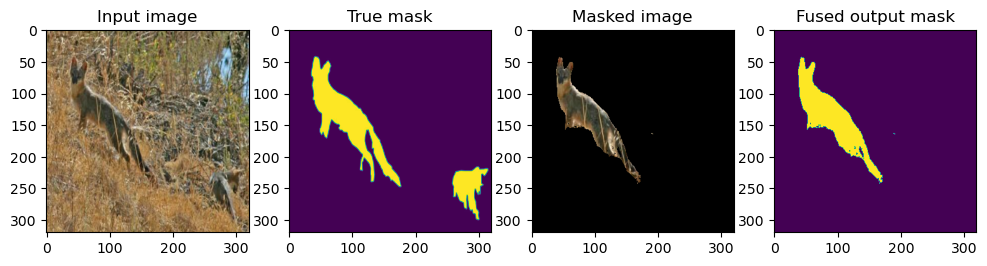

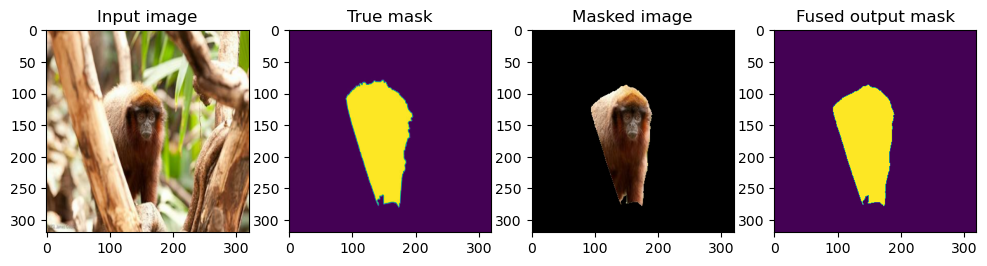

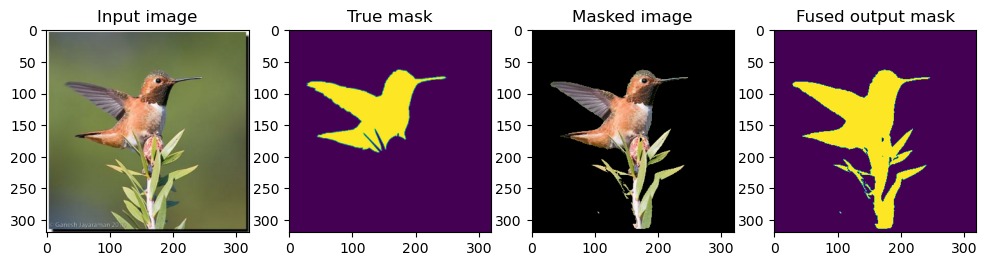

In [29]:
for image, mask in test_dataset.shuffle(80).take(1):
    out = model(image)
    for i in range(len(image)):
        out_mask = tf.math.round(out[0][i])
        display(
            [image[i], mask[i], np.multiply(image[i], out_mask), out_mask],
            ["Input image", "True mask", "Masked image", "Fused output mask"]
        )

In [12]:
saved_model = keras.models.load_model('./saved_models/u2net/best')

2023-03-18 15:07:46.836847: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


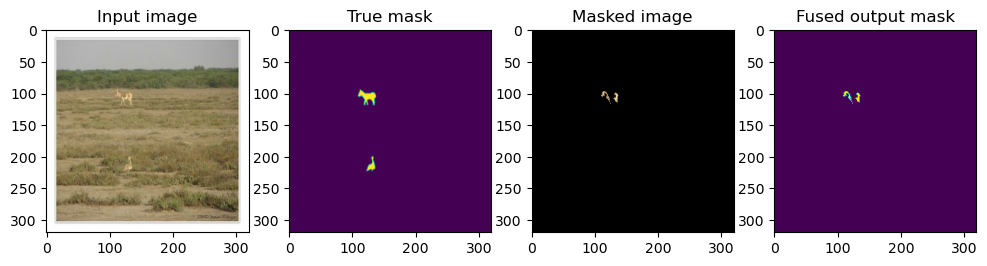

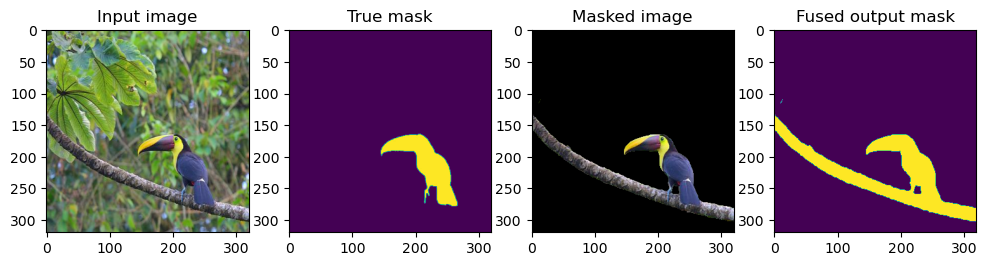

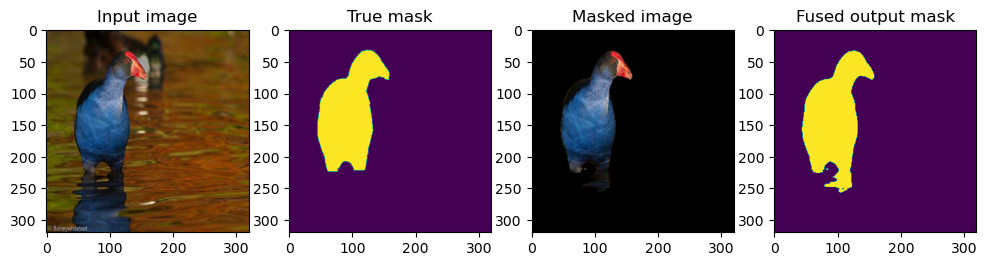

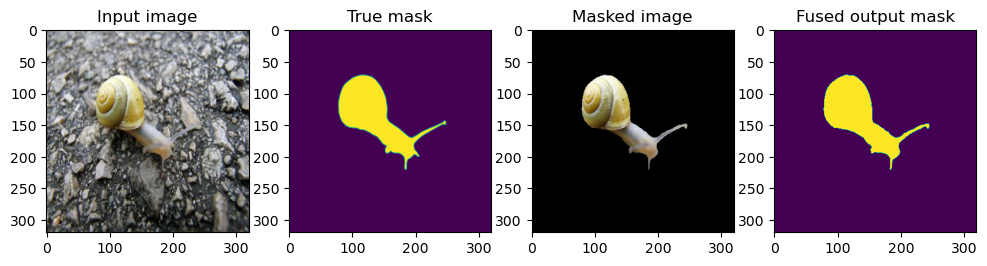

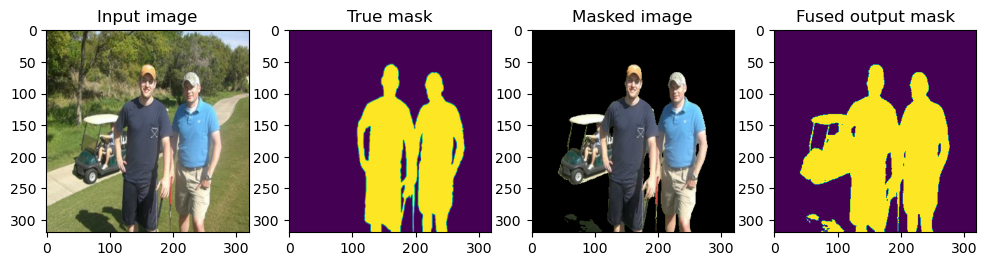

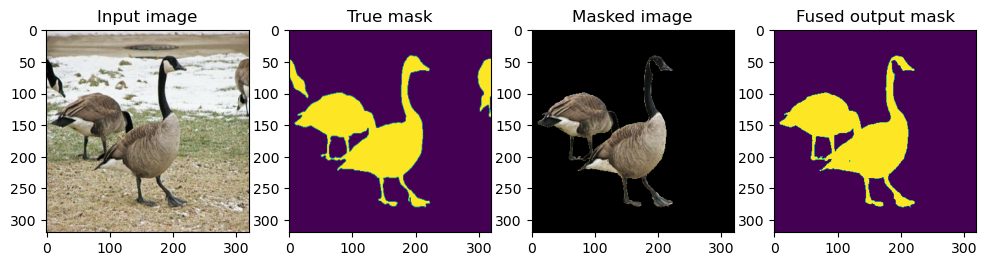

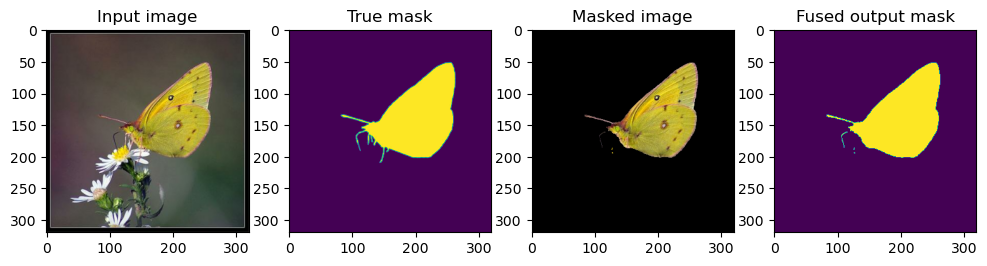

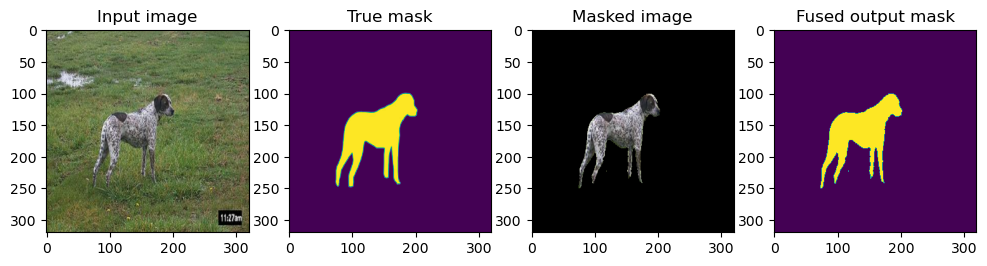

In [14]:
for image, mask in test_dataset.shuffle(80).take(1):
    out = saved_model(image)
    for i in range(len(image)):
        out_mask = tf.math.round(out[0][i])
        display(
            [image[i], mask[i], np.multiply(image[i], out_mask), out_mask],
            ["Input image", "True mask", "Masked image", "Fused output mask"]
        )

In [1]:
%load_ext tensorboard
%tensorboard --logdir ./logs